In [1]:
####  Import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import zscore

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import  OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import r2_score

import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio

In [2]:
####  Importer le dataset
print("Loading dataset...")
data = pd.read_csv("Walmart_Store_sales.csv")
print("...Done.")
print()

Loading dataset...
...Done.



In [3]:
####  Affichage des premières lignes du dataset
data.head(25)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,6.0,18-02-2011,1572117.54,NaN,59.61,3.045,214.777523,6.858
1,13.0,25-03-2011,1807545.43,0.0,42.38,3.435,128.616064,7.470
2,17.0,27-07-2012,NaN,0.0,NaN,NaN,130.719581,5.936
3,11.0,NaN,1244390.03,0.0,84.57,NaN,214.556497,7.346
4,6.0,28-05-2010,1644470.66,0.0,78.89,2.759,212.412888,7.092
5,4.0,28-05-2010,1857533.70,0.0,NaN,2.756,126.160226,7.896
6,15.0,03-06-2011,695396.19,0.0,69.80,4.069,134.855161,7.658
7,20.0,03-02-2012,2203523.20,0.0,39.93,3.617,213.023622,6.961
8,14.0,10-12-2010,2600519.26,0.0,30.54,3.109,NaN,NaN
9,3.0,NaN,418925.47,0.0,60.12,3.555,224.132020,6.833


In [4]:
####  Résumé statistique des données
data.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,150.000000,1.360000e+02,138.000000,132.000000,136.000000,138.000000,135.000000
mean,9.866667,1.249536e+06,0.079710,61.398106,3.320853,179.898509,7.598430
std,6.231191,6.474630e+05,0.271831,18.378901,0.478149,40.274956,1.577173
min,1.000000,2.689290e+05,0.000000,18.790000,2.514000,126.111903,5.143000
25%,4.000000,6.050757e+05,0.000000,45.587500,2.852250,131.970831,6.597500
50%,9.000000,1.261424e+06,0.000000,62.985000,3.451000,197.908893,7.470000
75%,15.750000,1.806386e+06,0.000000,76.345000,3.706250,214.934616,8.150000
max,20.000000,2.771397e+06,1.000000,91.650000,4.193000,226.968844,14.313000


In [5]:
####  Transformer la colonne "Holiday_Flag" en catégoriel
###### pas bon a retirer   data["Holiday_Flag"]=data["Holiday_Flag"].astype("category")

data['Holiday_Flag'] = data['Holiday_Flag'].replace({0.0: 'non', 1.0: 'oui'})

## Vérification
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         150 non-null    float64
 1   Date          132 non-null    object 
 2   Weekly_Sales  136 non-null    float64
 3   Holiday_Flag  138 non-null    object 
 4   Temperature   132 non-null    float64
 5   Fuel_Price    136 non-null    float64
 6   CPI           138 non-null    float64
 7   Unemployment  135 non-null    float64
dtypes: float64(6), object(2)
memory usage: 9.5+ KB


In [6]:
# Fonction pour convertir les valeurs
def convert_store(val):
    return 'Store_' + str(val).replace('.0', '')

# Application de la fonction à la colonne 'Store'
data['Store'] = data['Store'].apply(convert_store)


In [7]:
####  Vérification des valeurs vident
print('Poucentage des valeurs vident :')
display(100*data.isnull().sum()/data.shape[0])

Poucentage des valeurs vident :


Store            0.000000
Date            12.000000
Weekly_Sales     9.333333
Holiday_Flag     8.000000
Temperature     12.000000
Fuel_Price       9.333333
CPI              8.000000
Unemployment    10.000000
dtype: float64

In [8]:
####  Supprimer les valeurs manquantes
## Faire un copie de la dataset en cas de problemes
data_copie = data
data_copie = data_copie.dropna(subset=['Weekly_Sales'])
data_copie_Weekly_Sales_isnull = pd.isnull(data_copie['Weekly_Sales']).value_counts()

print("Nombres de valeurs vident/non vident : ")
display(data_copie_Weekly_Sales_isnull)
## Nous n'avons plus de valeurs vides dans la colonne 'Weekly_Sales'. Nous avons supprimer 14 lignes (150 - 136)

## Verifications
print("Pourcentage de données vident : ")
display(100*data_copie.isnull().sum()/data_copie.shape[0])

Nombres de valeurs vident/non vident : 


Weekly_Sales
False    136
Name: count, dtype: int64

Pourcentage de données vident : 


Store            0.000000
Date            13.235294
Weekly_Sales     0.000000
Holiday_Flag     8.088235
Temperature     11.029412
Fuel_Price       8.823529
CPI              8.088235
Unemployment    10.294118
dtype: float64

In [9]:
####  Supprimer valeurs vident de la variables "Date"
data_copie = data_copie.dropna(subset=['Date'])

## Verifications
print("Percentage of missing values: ")
display(100*data_copie.isnull().sum()/data_copie.shape[0])

Percentage of missing values: 


Store           0.000000
Date            0.000000
Weekly_Sales    0.000000
Holiday_Flag    7.627119
Temperature     9.322034
Fuel_Price      9.322034
CPI             7.627119
Unemployment    9.322034
dtype: float64

In [10]:
####  Faire une copie du dataset (en cas de problèmes)
Data_Date_copie = data_copie

## Convertir la chaîne de caractères en objet datetime
Data_Date_copie['Date'] = pd.to_datetime(Data_Date_copie['Date'], format='%d-%m-%Y')

## Extraire l'année, le mois, le jour et le jour de la semaine
Data_Date_copie['Years'] = Data_Date_copie['Date'].dt.year
Data_Date_copie['Month'] = Data_Date_copie['Date'].dt.month
Data_Date_copie['Days'] = Data_Date_copie['Date'].dt.day
Data_Date_copie['Day of the week'] = Data_Date_copie['Date'].dt.dayofweek

## Afficher le résultat
print('Nouveau dataframe :')
Data_Date_copie.head(5)

Nouveau dataframe :


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Years,Month,Days,Day of the week
0,Store_6,2011-02-18,1572117.54,NaN,59.61,3.045,214.777523,6.858,2011,2,18,4
1,Store_13,2011-03-25,1807545.43,non,42.38,3.435,128.616064,7.470,2011,3,25,4
4,Store_6,2010-05-28,1644470.66,non,78.89,2.759,212.412888,7.092,2010,5,28,4
5,Store_4,2010-05-28,1857533.70,non,NaN,2.756,126.160226,7.896,2010,5,28,4
6,Store_15,2011-06-03,695396.19,non,69.80,4.069,134.855161,7.658,2011,6,3,4


In [11]:
####  Supprimer valeurs vident des autres variables
Data_Date_copie = Data_Date_copie.dropna(subset=['Temperature', 'Fuel_Price', 'CPI', 'Unemployment','Holiday_Flag'])

## Verifications
print("Pourcentage des valeurs manquantes : ")
display(100*Data_Date_copie.isnull().sum()/Data_Date_copie.shape[0])

Pourcentage des valeurs manquantes : 


Store              0.0
Date               0.0
Weekly_Sales       0.0
Holiday_Flag       0.0
Temperature        0.0
Fuel_Price         0.0
CPI                0.0
Unemployment       0.0
Years              0.0
Month              0.0
Days               0.0
Day of the week    0.0
dtype: float64

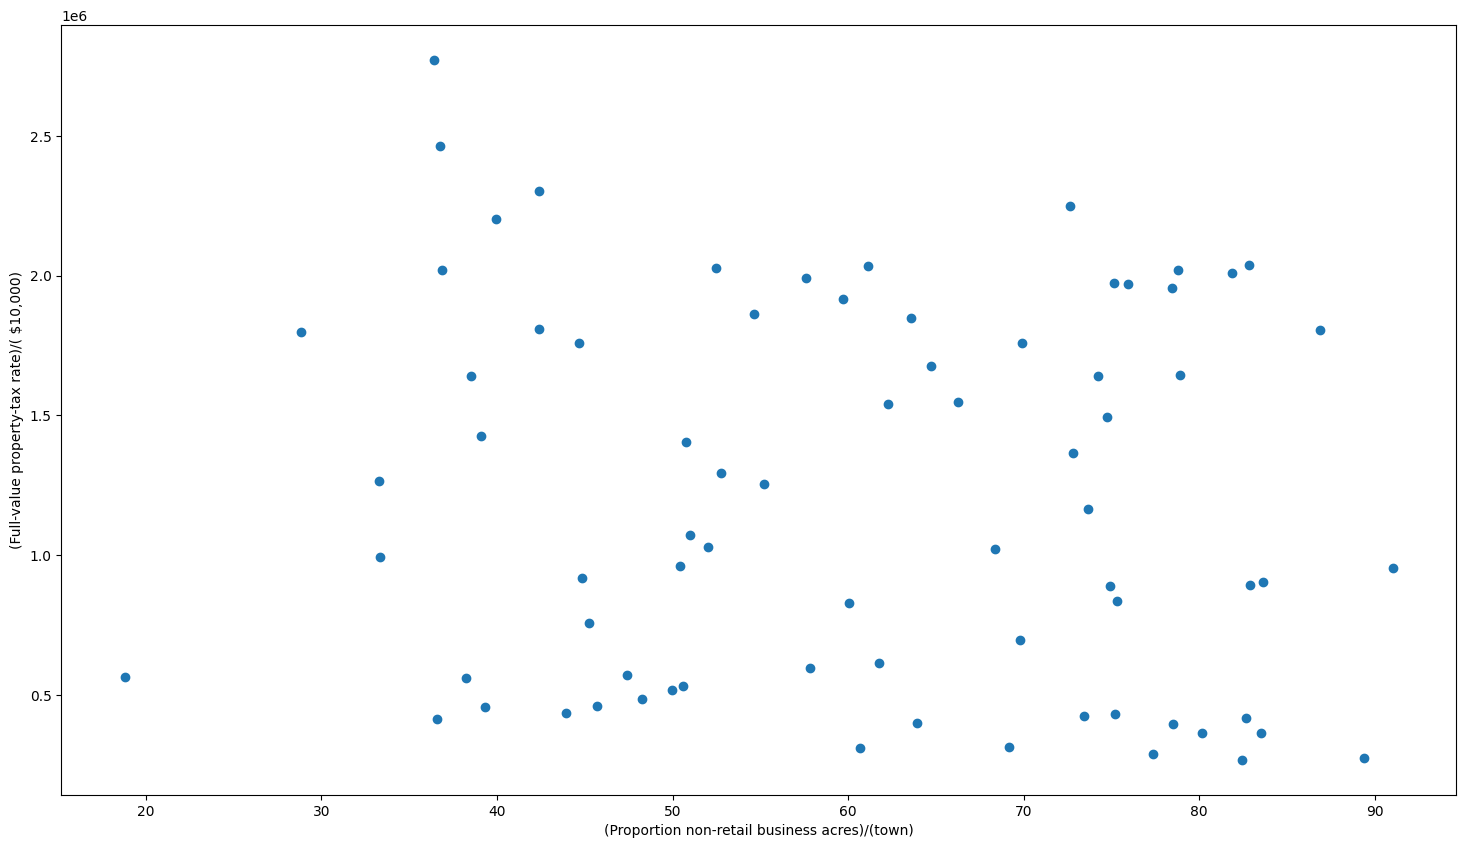

In [12]:
#### valeurs aberrantes de la colonne "Temperature"
# Scatter plot
fig, ax = plt.subplots(figsize=(18, 10))
ax.scatter(Data_Date_copie['Temperature'], Data_Date_copie['Weekly_Sales'])
 
# x-axis label
ax.set_xlabel('(Proportion non-retail business acres)/(town)')
 
# y-axis label
ax.set_ylabel('(Full-value property-tax rate)/( $10,000)')
plt.show()

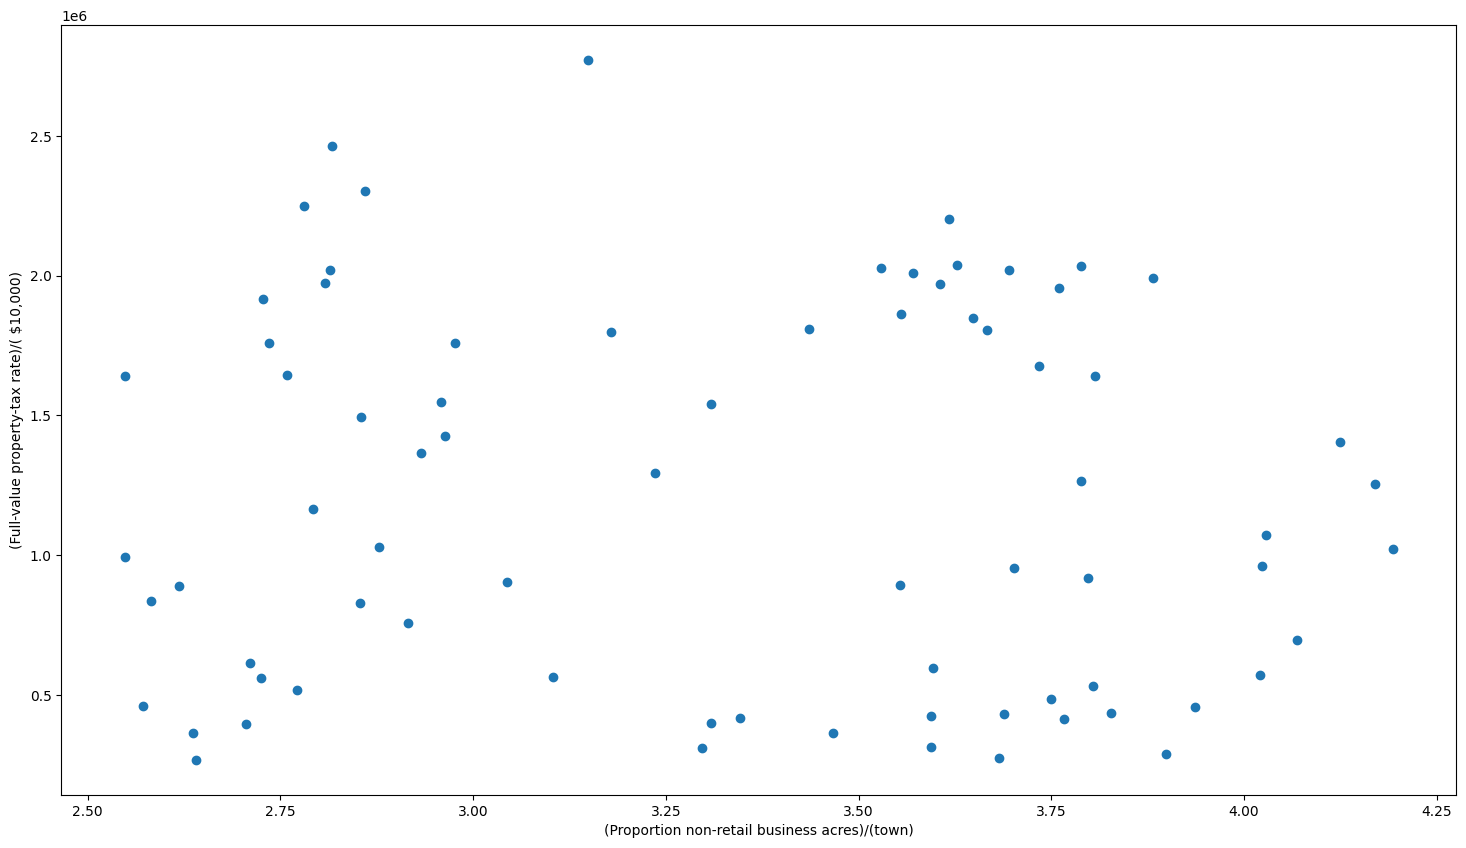

In [13]:
#### valeurs aberrantes de la colonne "Fuel_Price"
# Scatter plot
fig, ax = plt.subplots(figsize=(18, 10))
ax.scatter(Data_Date_copie['Fuel_Price'], Data_Date_copie['Weekly_Sales'])
 
# x-axis label
ax.set_xlabel('(Proportion non-retail business acres)/(town)')
 
# y-axis label
ax.set_ylabel('(Full-value property-tax rate)/( $10,000)')
plt.show()

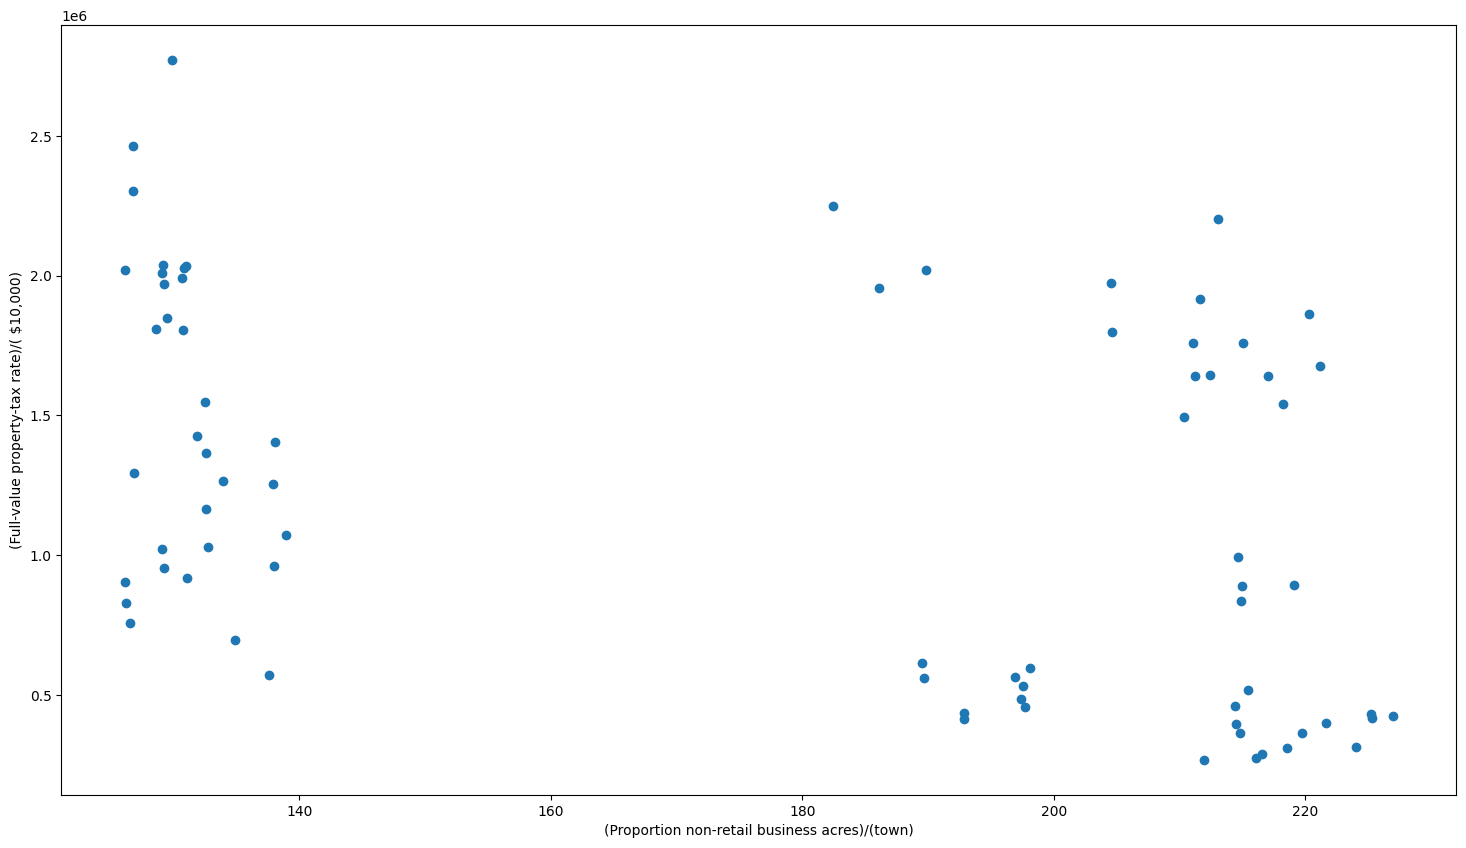

In [14]:
#### valeurs aberrantes de la colonne "CPI"
# Scatter plot
fig, ax = plt.subplots(figsize=(18, 10))
ax.scatter(Data_Date_copie['CPI'], Data_Date_copie['Weekly_Sales'])
 
# x-axis label
ax.set_xlabel('(Proportion non-retail business acres)/(town)')
 
# y-axis label
ax.set_ylabel('(Full-value property-tax rate)/( $10,000)')
plt.show()

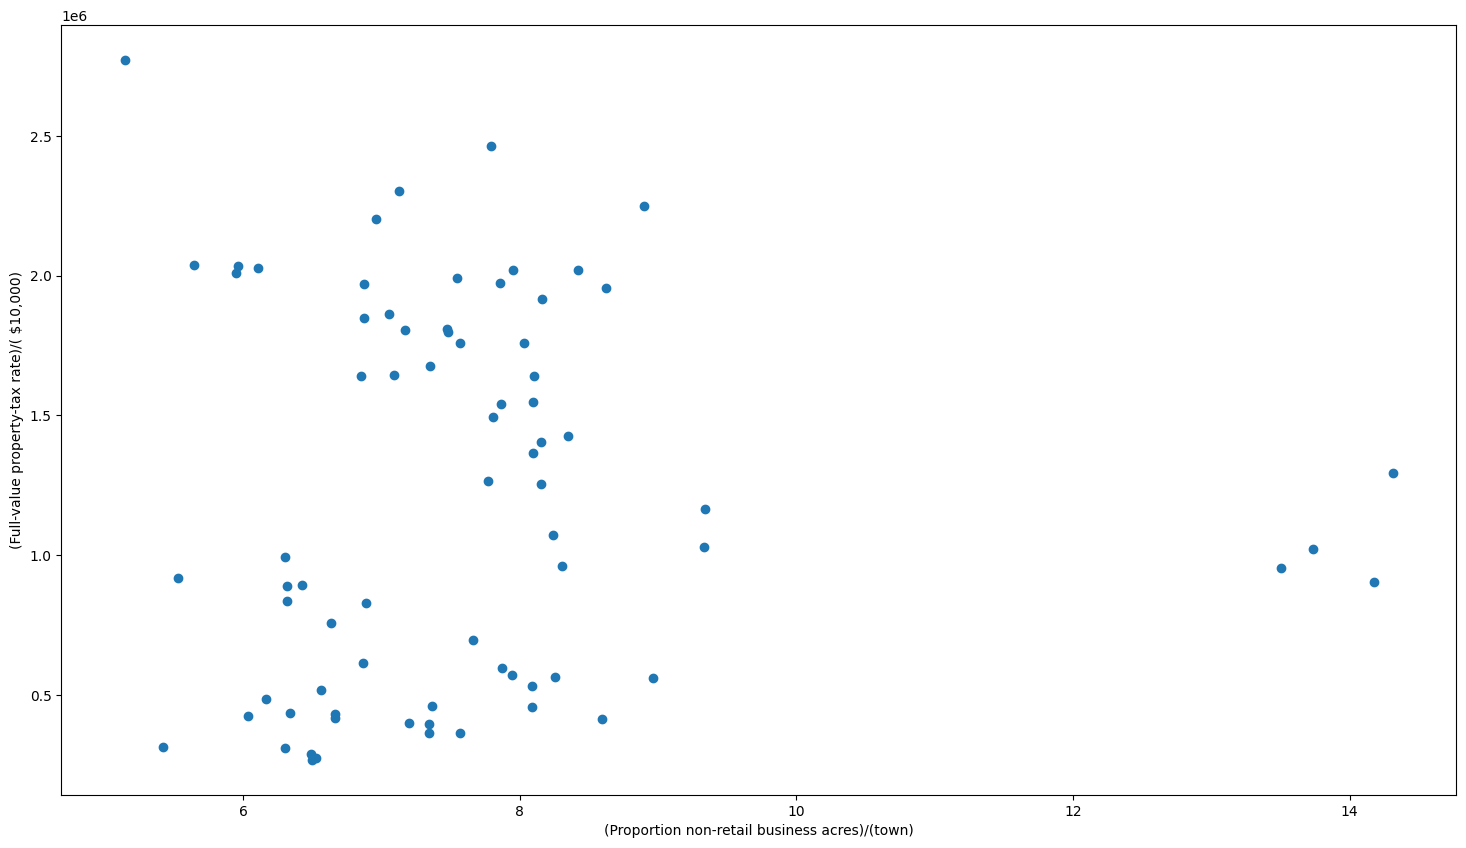

In [15]:
#### valeurs aberrantes de la colonne "Unemployment"
# Scatter plot
fig, ax = plt.subplots(figsize=(18, 10))
ax.scatter(Data_Date_copie['Unemployment'], Data_Date_copie['Weekly_Sales'])
 
# x-axis label
ax.set_xlabel('(Proportion non-retail business acres)/(town)')
 
# y-axis label
ax.set_ylabel('(Full-value property-tax rate)/( $10,000)')
plt.show()

In [16]:
# Colonnes pour vérification des valeurs aberrantes
columns_to_check = ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment']

# Calculer la moyenne et l'écart-type pour chaque colonne numérique
mean_values = Data_Date_copie[columns_to_check].mean()
std_values = Data_Date_copie[columns_to_check].std()

# Identifier les valeurs aberrantes pour chaque colonne
aberrant_indices = []
for col in columns_to_check:
    lower_bound = mean_values[col] - 3 * std_values[col]
    upper_bound = mean_values[col] + 3 * std_values[col]
    aberrant_indices.extend(Data_Date_copie[(Data_Date_copie[col] < lower_bound) | (Data_Date_copie[col] > upper_bound)].index)

## Verifications des valeurs abérrantes et invalides
print("valeurs abérrantes et invalides : ")
aberrant_indices

# Supprimer les lignes contenant des valeurs aberrantes
df_cleaned = Data_Date_copie.drop(aberrant_indices)

## Afficher le résultat
print('Nouveau dataframe :')
df_cleaned.head(5)

valeurs abérrantes et invalides : 
Nouveau dataframe :


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Years,Month,Days,Day of the week
1,Store_13,2011-03-25,1807545.43,non,42.38,3.435,128.616064,7.470,2011,3,25,4
4,Store_6,2010-05-28,1644470.66,non,78.89,2.759,212.412888,7.092,2010,5,28,4
6,Store_15,2011-06-03,695396.19,non,69.80,4.069,134.855161,7.658,2011,6,3,4
7,Store_20,2012-02-03,2203523.20,non,39.93,3.617,213.023622,6.961,2012,2,3,4
10,Store_8,2011-08-19,895066.50,non,82.92,3.554,219.070197,6.425,2011,8,19,4


In [17]:
####  Supprimer la colonne Date
walmart_data = df_cleaned.drop(columns=['Date'])

## Voir le nouveau dataframe
print('Nouveau dataframe :')
walmart_data.head(25)

Nouveau dataframe :


,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Years,Month,Days,Day of the week
1,Store_13,1807545.43,non,42.38,3.435,128.616064,7.470,2011,3,25,4
4,Store_6,1644470.66,non,78.89,2.759,212.412888,7.092,2010,5,28,4
6,Store_15,695396.19,non,69.80,4.069,134.855161,7.658,2011,6,3,4
7,Store_20,2203523.20,non,39.93,3.617,213.023622,6.961,2012,2,3,4
10,Store_8,895066.50,non,82.92,3.554,219.070197,6.425,2011,8,19,4
11,Store_18,1029618.10,non,52.02,2.878,132.763355,9.331,2010,10,15,4
12,Store_7,414094.05,non,36.61,3.767,192.826069,8.595,2011,5,13,4
13,Store_1,1677472.78,non,64.74,3.734,221.211813,7.348,2012,3,16,4
14,Store_17,829207.27,non,60.07,2.853,126.234600,6.885,2010,10,1,4
20,Store_7,561145.14,non,38.26,2.725,189.704822,8.963,2010,4,2,4


In [18]:
#### METTRE DANS CETTE PARTIE LA DATA VISUALISASTION ####

In [19]:
# Other stats

print("Divers informations sur le Dataframe: ")
walmart_data.info()

print("Contenu de la variable Store: ")
display(walmart_data["Store"].value_counts())
print()

print("Contenu de la variable Weekly_Sales: ")
display(walmart_data["Weekly_Sales"].value_counts())
print()

print("Contenu de la variable Holiday_Flag: ")
display(walmart_data["Holiday_Flag"].value_counts())
print()

print("Contenu de la variable Temperature: ")
display(walmart_data["Temperature"].value_counts())
print()

print("Contenu de la variable Fuel_Price: ")
display(walmart_data["Fuel_Price"].value_counts())
print()

print("Contenu de la variable CPI: ")
display(walmart_data["CPI"].value_counts())
print()

print("Contenu de la variable Unemployment: ")
display(walmart_data["Unemployment"].value_counts())
print()

Divers informations sur le Dataframe: 
<class 'pandas.core.frame.DataFrame'>
Index: 71 entries, 1 to 149
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Store            71 non-null     object 
 1   Weekly_Sales     71 non-null     float64
 2   Holiday_Flag     71 non-null     object 
 3   Temperature      71 non-null     float64
 4   Fuel_Price       71 non-null     float64
 5   CPI              71 non-null     float64
 6   Unemployment     71 non-null     float64
 7   Years            71 non-null     int32  
 8   Month            71 non-null     int32  
 9   Days             71 non-null     int32  
 10  Day of the week  71 non-null     int32  
dtypes: float64(5), int32(4), object(2)
memory usage: 5.5+ KB
Contenu de la variable Store: 


Store
Store_3     8
Store_13    7
Store_7     6
Store_19    6
Store_5     5
Store_18    4
Store_8     4
Store_1     4
Store_4     4
Store_17    3
Store_20    3
Store_16    3
Store_2     3
Store_14    3
Store_6     2
Store_15    2
Store_10    2
Store_9     1
Store_11    1
Name: count, dtype: int64


Contenu de la variable Weekly_Sales: 


Weekly_Sales
1807545.43    1
431985.36     1
419497.95     1
2302504.86    1
364076.85     1
             ..
1641957.44    1
961186.23     1
311906.70     1
2008344.92    1
1255087.26    1
Name: count, Length: 71, dtype: int64


Contenu de la variable Holiday_Flag: 


Holiday_Flag
non    65
oui     6
Name: count, dtype: int64


Contenu de la variable Temperature: 


Temperature
42.38    1
75.19    1
82.70    1
42.40    1
83.52    1
        ..
38.51    1
50.43    1
60.71    1
81.85    1
55.20    1
Name: count, Length: 71, dtype: int64


Contenu de la variable Fuel_Price: 


Fuel_Price
2.548    2
3.308    2
3.594    2
3.435    1
3.688    1
        ..
2.728    1
3.666    1
3.648    1
2.619    1
4.170    1
Name: count, Length: 68, dtype: int64


Contenu de la variable CPI: 


CPI
126.793400    2
128.616064    1
211.064888    1
225.306861    1
214.785826    1
             ..
211.660898    1
130.719633    1
129.518333    1
214.936279    1
137.923067    1
Name: count, Length: 70, dtype: int64


Contenu de la variable Unemployment: 


Unemployment
6.315    2
8.090    2
6.877    2
8.099    2
6.664    2
        ..
6.162    1
5.965    1
8.163    1
7.170    1
8.899    1
Name: count, Length: 64, dtype: int64

In [20]:
# Separate target variable Y from features X
print("Separating labels from features...")
target_variable = "Weekly_Sales"

X = walmart_data.drop(target_variable, axis = 1)
Y = walmart_data.loc[:,target_variable]

print("...Done.")
print()

print('Y : ')
print(Y.head())
print()
print('X :')
print(X.head())

Separating labels from features...
...Done.

Y : 
1     1807545.43
4     1644470.66
6      695396.19
7     2203523.20
10     895066.50
Name: Weekly_Sales, dtype: float64

X :
       Store Holiday_Flag  Temperature  Fuel_Price         CPI  Unemployment  \
1   Store_13          non        42.38       3.435  128.616064         7.470   
4    Store_6          non        78.89       2.759  212.412888         7.092   
6   Store_15          non        69.80       4.069  134.855161         7.658   
7   Store_20          non        39.93       3.617  213.023622         6.961   
10   Store_8          non        82.92       3.554  219.070197         6.425   

    Years  Month  Days  Day of the week  
1    2011      3    25                4  
4    2010      5    28                4  
6    2011      6     3                4  
7    2012      2     3                4  
10   2011      8    19                4  


In [21]:
# Automatically detect names of numeric/categorical columns
numeric_features = []
categorical_features = []
for i,t in X.dtypes.items():
    if ('float' in str(t)) or ('int' in str(t)) :
        numeric_features.append(i)
    else :
        categorical_features.append(i)

print('Found numeric features ', numeric_features)
print('Found categorical features ', categorical_features)

Found numeric features  ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Years', 'Month', 'Days', 'Day of the week']
Found categorical features  ['Store', 'Holiday_Flag']


In [22]:
# Divide dataset Train set & Test set 
print("Dividing into train and test sets...")
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=2)
print("...Done.")
print()

Dividing into train and test sets...
...Done.



In [23]:
# Create pipeline for numeric features
numeric_transformer = StandardScaler()

# Create pipeline for categorical features
categorical_transformer = OneHotEncoder(drop='first')

# Use ColumnTransformer to make a preprocessor object that describes all the treatments to be done
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
])

print(preprocessor)

ColumnTransformer(transformers=[('num', StandardScaler(),
                                 ['Temperature', 'Fuel_Price', 'CPI',
                                  'Unemployment', 'Years', 'Month', 'Days',
                                  'Day of the week']),
                                ('cat', OneHotEncoder(drop='first'),
                                 ['Store', 'Holiday_Flag'])])


In [24]:
# Preprocessings on train set
print("Performing preprocessings on train set...")
print(X_train.head())
X_train = preprocessor.fit_transform(X_train)
print("...Done")
print(X_train[0:5,:])
print()

# Preprocessings on test set
print("Performing preprocessings on test set...")
print(X_test.head())
X_test = preprocessor.transform(X_test)
print("...Done")
print(X_test[0:5,:])

Performing preprocessings on train set...
        Store Holiday_Flag  Temperature  Fuel_Price         CPI  Unemployment  \
138   Store_6          non        74.24       3.807  217.014694         6.855   
49   Store_16          non        48.29       3.750  197.413326         6.162   
46    Store_5          non        82.46       2.640  211.927001         6.496   
144   Store_3          non        73.44       3.594  226.968844         6.034   
51    Store_2          non        59.69       2.728  211.660898         8.163   

     Years  Month  Days  Day of the week  
138   2011      4    22                4  
49    2012      3    30                4  
46    2010      7    30                4  
144   2012     10    19                4  
51    2010     11    12                4  
...Done
[[ 0.87901264  1.01281672  1.00354485 -0.66591209  0.10242547 -0.79384616
   0.68992236  0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.

In [41]:
# Train model
print("Train model...")
regressor = LinearRegression()
regressor.fit(X_train, y_train)
print("...Done.")

Train model...
...Done.


In [26]:
# Predictions on training set
print("Predictions on training set...")
Y_train_pred = regressor.predict(X_train)
print("...Done.")
print(Y_train_pred)
print()

Predictions on training set...
...Done.
[1639358.93        483920.25252363  262575.02599658  452782.90376722
 1929244.48290841  933761.37440218 2006538.27084248  616436.70486499
 1898018.66256199 1449021.30240213 1306483.67860207  900184.21737803
  814793.75335361  459274.51073226  603417.81026181 2088683.65046242
 1757242.51        160134.34131935  650340.80906731 1388096.78579407
  791846.39926836  615666.61093269 2134180.01983145  310669.61290848
  527347.35836044  447211.07413069  427936.27228778 1849370.95709158
 1108809.10187229  955470.72206586 2127519.4186951  2279612.98906821
  472968.88164981 1869640.61931189  421857.34021549 1621873.32351657
  889452.58353195  462452.54542703 2144886.88865164 2189903.46957945
 1128357.63386929 1357647.93960888 2031236.79093179 1512760.76359284
 2057585.99531547 1515424.74597672  433268.53268408 1062432.67692334
 1971127.15527363  356229.165394   1898352.14743801 1573909.91050671
  519823.3         931401.76733508  436572.34747637 1961869.352

In [27]:
# Predictions on test set
print("Predictions on test set...")
Y_test_pred = regressor.predict(X_test)
print("...Done.")
print(Y_test_pred)
print()

Predictions on test set...
...Done.
[ 615305.92137504 1701700.65022952 2096501.2029701  2033587.08467773
  424611.92209401  428403.23204631 1339085.60682674  425500.16147378
  999973.70082092 2260418.18984986 1545619.04582411 2010027.33847787
 1986876.28488573 1893922.2567167   216840.02253042]



In [28]:
# Print R2 scores
print("R2 score on training set : ", r2_score(y_train, Y_train_pred))
print("R2 score on test set : ", r2_score(y_test, Y_test_pred))

R2 score on training set :  0.9884331993216303
R2 score on test set :  0.9557678387449258


In [29]:
# Correlation matrix
corr_matrix = walmart_data.corr(numeric_only = True).round(2)

import plotly.figure_factory as ff

fig = ff.create_annotated_heatmap(corr_matrix.values,
                                  x = corr_matrix.columns.tolist(),
                                  y = corr_matrix.index.tolist())


fig.show()

In [30]:
# As we didn't implement a complex preprocessing pipeline, the column names is just the initial list of features !
column_names = [c for c in walmart_data.columns if c != target_variable]
print(column_names)


['Store', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Years', 'Month', 'Days', 'Day of the week']


In [35]:

# Create a pandas DataFrame
coefs = pd.DataFrame(index = column_names, data = regressor.coef_[:10].transpose(), columns=["coefficients"])

# Trier les résultats par ordre décroissant des coefficients
coefs_sorted = coefs.sort_values(by="coefficients", ascending=False)

# Afficher les résultats
print(coefs_sorted)

                 coefficients
Days             1.645975e+06
Temperature      5.893830e+05
Day of the week  2.594693e+05
CPI              3.304717e+04
Unemployment     1.957874e+04
Fuel_Price       1.140717e+04
Month           -2.328306e-10
Store           -2.481058e+04
Years           -4.745071e+04
Holiday_Flag    -9.353943e+04


In [36]:
# Compute abs() and sort values
feature_importance = abs(coefs).sort_values(by = 'coefficients')
# Plot coefficients
fig = px.bar(feature_importance, orientation = 'h')
fig.update_layout(showlegend=False, 
                  margin={'l': 120} # to avoid cropping of column names
                 )
fig.show()

In [ ]:
#### Ridge ####

In [44]:
# Perform grid search
print("Grid search...")
regressor = Ridge()
# Grid of values to be tested
params = {
    'alpha': [0.0, 0.1, 0.5, 1.0] # 0 corresponds to no regularization

}
gridsearch = GridSearchCV(regressor, param_grid = params, cv = 3) # cv : the number of folds to be used for CV
gridsearch.fit(X_train, y_train)
print("...Done.")
print("Best hyperparameters : ", gridsearch.best_params_)
print("Best R2 score : ", gridsearch.best_score_)

Grid search...
...Done.
Best hyperparameters :  {'alpha': 0.0}
Best R2 score :  0.8554704195883543


In [39]:
# Print R2 scores
print("R2 score on training set : ", gridsearch.score(X_train, y_train))
print("R2 score on test set : ", gridsearch.score(X_test, y_test))

R2 score on training set :  0.9884331993216303
R2 score on test set :  0.9557678387449257


In [45]:
# Perform 3-fold cross-validation to evaluate the generalized R2 score obtained with a Ridge model
print("3-fold cross-validation...")
regressor = Ridge()
scores = cross_val_score(regressor, X_train, y_train, cv=3)
print('The cross-validated R2-score is : ', scores.mean())
print('The standard deviation is : ', scores.std())

3-fold cross-validation...
The cross-validated R2-score is :  0.5762606826499318
The standard deviation is :  0.12089495490390756
